  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.3 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/probml_utils/plotting.py:70: UserWarning: renaming /Users/kpmurphy/github/bookv2/figures/seqlogo_scaled.pdf to /Users/kpmurphy/github/bookv2/figures/seqlogo_scaled.pdf because LATEXIFY is False
  warnings.warn(


saving image to /Users/kpmurphy/github/bookv2/figures/seqlogo_scaled.pdf
Figure size: [10.   2.5]


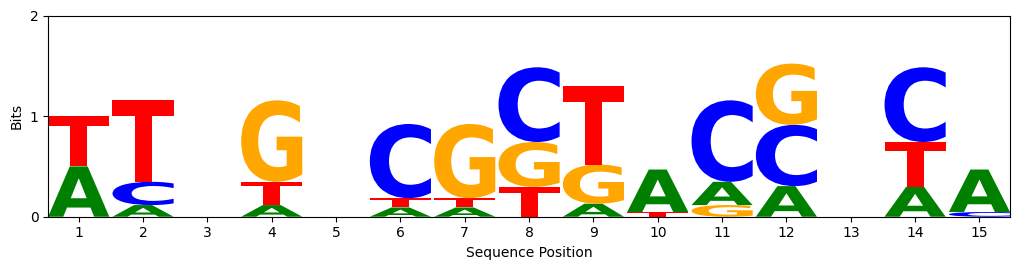

In [1]:
# DNA Sequence Demonstration
# Author: Drishtii@, mu-arkhipov@
# Based on
# https://github.com/probml/pmtk3/blob/master/demos/seqlogoDemo.m
# See https://github.com/probml/pml-book/issues/581


##!pip install -qq logomaker


import jax.numpy as jnp
import os

try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install -qq pandas
    import pandas as pd
try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

try:
    import logomaker
except ModuleNotFoundError:
    %pip install -qq logomaker
    import logomaker
import matplotlib.pyplot as plt

os.environ['FIG_DIR'] = '/Users/kpmurphy/github/bookv2/figures'

seqs = [
    "atagccggtacggca",
    "ttagctgcaaccgca",
    "tcagccactagagca",
    "ataaccgcgaccgca",
    "ttagccgctaaggta",
    "taagcctcgtacgta",
    "ttagccgttacggcc",
    "atatccggtacagta",
    "atagcaggtaccgaa",
    "acatccgtgacggaa",
]

seq_len = len(seqs[0])
letter_to_cat = {"a": 0, "c": 1, "g": 2, "t": 3}
count_mat = jnp.zeros([seq_len, len(letter_to_cat)])
for seq in seqs:
    for n_pos, letter in enumerate(seq):
        count_mat = count_mat.at[n_pos, letter_to_cat[letter]].add(1)

prob_mat = count_mat / jnp.sum(count_mat, 1, keepdims=True)

entropy = jnp.zeros(seq_len)
for n_pos in range(seq_len):
    entropy = entropy.at[n_pos].set(-sum(p * jnp.log2(p) for p in prob_mat[n_pos, :] if p > 0))
    # entropy[n_pos] = 2

pos_height_mat = prob_mat * entropy.reshape(-1, 1)
# position
df = pd.DataFrame(pos_height_mat, columns=["A", "C", "G", "T"])
df.index = jnp.arange(1, len(df) + 1)

logos = logomaker.Logo(df)
logos.ax.set_xticks(jnp.arange(1, 16))
logos.ax.set_yticks(jnp.linspace(0, 2, 3))
logos.ax.set_ylabel("Bits")
logos.ax.set_xlabel("Sequence Position")
pml.savefig("seqlogo_scaled")
plt.show()